# 백준 20056(https://www.acmicpc.net/problem/20056)

어른 상어가 마법사가 되었고, 파이어볼을 배웠다.

마법사 상어가 크기가 N×N인 격자에 파이어볼 M개를 발사했다. 가장 처음에 파이어볼은 각자 위치에서 이동을 대기하고 있다. i번 파이어볼의 위치는 (ri, ci), 질량은 mi이고, 방향은 di, 속력은 si이다. 위치 (r, c)는 r행 c열을 의미한다.

격자의 행과 열은 1번부터 N번까지 번호가 매겨져 있고, 1번 행은 N번과 연결되어 있고, 1번 열은 N번 열과 연결되어 있다.

파이어볼의 방향은 어떤 칸과 인접한 8개의 칸의 방향을 의미하며, 정수로는 다

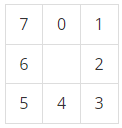

마법사 상어가 모든 파이어볼에게 이동을 명령하면 다음이 일들이 일어난다.
1. 
모든 파이어볼이 자신의 방향 di로 속력 si칸 만큼 이동한다- .
이동하는 중에는 같은 칸에 여러 개의 파이어볼이 있을 수도 있
2. 다.
이동이 모두 끝난 뒤, 2개 이상의 파이어볼이 있는 칸에서는 다음과 같은 일이 일어1) 난다.
같은 칸에 있는 파이어볼은 모두 하나로 합2) 쳐진다.
파이어볼은 4개의 파이어볼로 나3) 누어진다.
나누어진 파이어볼의 질량, 속력, 방향은 다3-1) 음과 같다.
질량은 ⌊(합쳐진 파이어볼 질량의 합3-2) )/5⌋이다.
속력은 ⌊(합쳐진 파이어볼 속력의 합)/(합쳐진 파이어볼의3-3)  개수)⌋이다.
합쳐지는 파이어볼의 방향이 모두 홀수이거나 모두 짝수이면, 방향은 0, 2, 4, 6이 되고, 그렇지 않으면 1, 3, 4) 5, 7이 된다.
질량이 0인 파이어볼은 
소멸되어 없어진다.
마법사 상어가 이동을 K번 명령한 후, 남아있는 파이어볼 질량의 합을 구해보자.음과 같다.

> 입력: 첫째 줄에 N, M이 주어진다. 둘째 줄부터 N개의 줄에는 N개의 정수가 주어진다. r번째 행의 c번째 정수는 A[r][c]를 의미한다. 다음 M개의 줄에는 이동의 정보 di, si가 순서대로 한 줄에 하나씩 주어진다.

> 출력: 첫째 줄에 M번의 이동이 모두 끝난 후 바구니에 들어있는 물의 양의 합을 출력한다.

## 1. Python solution1

In [60]:
N, M, K = map(int, input().split())
fireballs = []
for _ in range(M):
    _r, _c, _m, _s, _d = list(map(int, input().split()))
    fireballs.append([_r-1, _c-1, _m, _s, _d])

MAP = [[[] for _ in range(N)] for _ in range(N)]

dx = [-1, -1, 0, 1, 1, 1, 0, -1]
dy = [0, 1, 1, 1, 0, -1, -1, -1]

for _ in range(K):
    # 파이어볼 이동
    while fireballs:
        cr, cc, cm, cs, cd = fireballs.pop(0)
        nr = (cr + cs * dx[cd]) % N  # 1번-N번 행 연결되어있기 때문
        nc = (cc + cs * dy[cd]) % N
        MAP[nr][nc].append([cm, cs, cd])

    # 2개 이상인지 체크
    for r in range(N):
        for c in range(N):
            # 2개 이상인 경우 -> 4개의 파이어볼로 쪼개기
            if len(MAP[r][c]) > 1:
                sum_m, sum_s, cnt_odd, cnt_even, cnt = 0, 0, 0, 0, len(MAP[r][c])
                while MAP[r][c]:
                    _m, _s, _d = MAP[r][c].pop(0)
                    sum_m += _m
                    sum_s += _s
                    if _d % 2:
                        cnt_odd += 1
                    else:
                        cnt_even += 1
                if cnt_odd == cnt or cnt_even == cnt:  # 모두 홀수이거나 모두 짝수인 경우
                    nd = [0, 2, 4, 6]
                else:
                    nd = [1, 3, 5, 7]
                if sum_m//5:  # 질량 0이면 소멸
                    for d in nd:
                        fireballs.append([r, c, sum_m//5, sum_s//cnt, d])

            # 1개인 경우
            if len(MAP[r][c]) == 1:
                fireballs.append([r, c] + MAP[r][c].pop())

print(sum([f[2] for f in fireballs]))

 4 2 1
 1 1 5 2 2
 1 4 7 1 6


8
